Running Decision Tree section...
Target names: ['setosa' 'versicolor' 'virginica']
First 10 target values: [0 0 0 0 0 0 0 0 0 0]
Number of classes: 3
Saved GraphViz DOT to outputs/Iris_DTree.dot


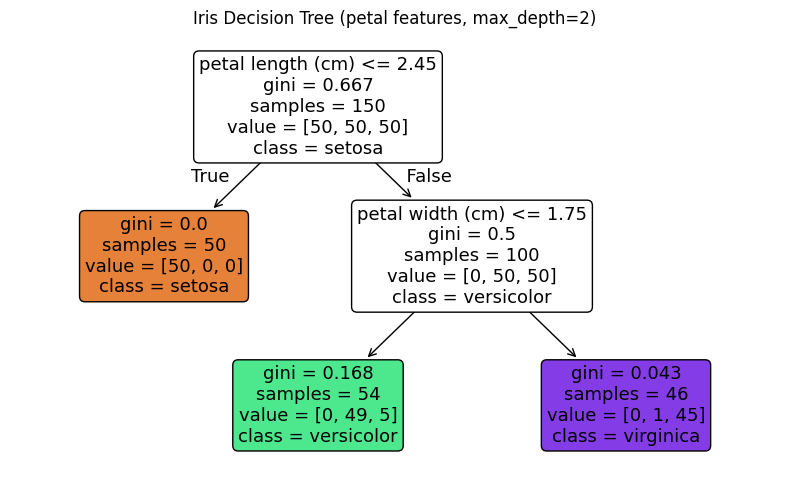


Manual root Gini: 0.667
Approx best thresholds found: petal length ~ 1.9 , petal width ~ 0.6

Sample [[5.0, 1.5]] predicted probabilities:
  setosa    : 0.000
  versicolor: 0.907
  virginica : 0.093
Predicted class: versicolor
k=3 petal-only tree scores: [0.98, 0.92, 0.92] avg: 0.94
k=5 petal-only tree scores: [0.967, 0.967, 0.933, 0.933, 0.933] avg: 0.947
k=10 petal-only tree scores: [1.0, 1.0, 1.0, 0.933, 1.0, 0.867, 0.867, 1.0, 0.933, 0.867] avg: 0.947
Unconstrained tree (all features) 5-fold avg accuracy: 0.953
Entropy tree test accuracy (30% test): 0.8889
Entropy 5-fold avg: 0.9533


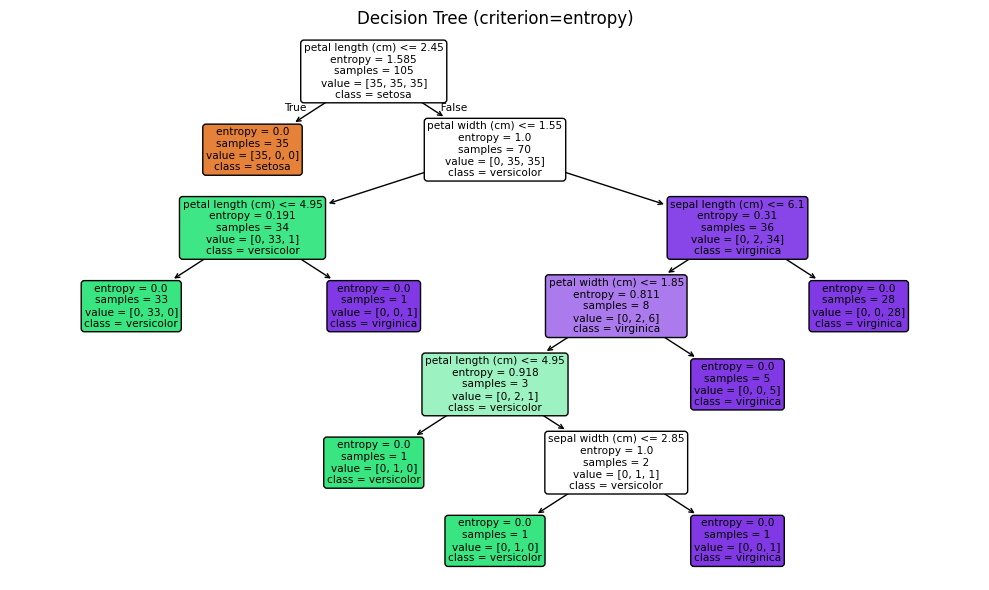


Running PCA and model experiments...

Logistic Regression (Iris, original features)
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45


Logistic Regression (Iris, PCA=2 components)
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45


Decision Tree (Iris, baseline)
              precision    recall  f1-score   support

      setosa       1

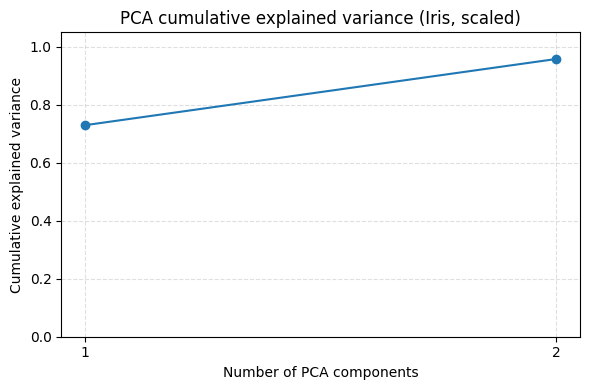


Logistic Regression (Wine, original features)
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       0.91      1.00      0.95        21
     class_2       1.00      0.87      0.93        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54

Wine PCA reduced to 10 components to keep 95% variance

Logistic Regression (Wine, PCA transformed)
              precision    recall  f1-score   support

     class_0       0.95      1.00      0.97        18
     class_1       1.00      0.95      0.98        21
     class_2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


Project template:

Project Step 1 Template (brief):
 - descriptive_analysis: ['df.head()',

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
"""
Decision tree and Dimension Reduction
Complete script implementing the practical assignment:
- I. Decision Tree (Iris)
- II. PCA experiments (Iris and Wine)
- III. Project Step 1 template

This is a single-file runnable script intended to be used inside a Jupyter environment
or as a Python script. Some plotting/display lines are designed for notebooks.

Save as: LAB5_Decision_Tree_and_PCA.py
"""

# Standard imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_wine
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


def kfoldCrossValidation(X, y, M, k=5, random_state=42):
    """Perform k-fold cross validation and return (scores_list, mean_score)."""
    kfold = KFold(n_splits=k, shuffle=True, random_state=random_state)
    scores = []
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        M.fit(X_train, y_train)
        y_pred = M.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))
    return scores, np.mean(scores)


# ------------------------- I. Decision Tree (Iris) -------------------------

def decision_tree_iris(output_dir='outputs'):
    os.makedirs(output_dir, exist_ok=True)

    iris = load_iris()
    X_all = iris.data
    y_all = iris.target

    # 1-2: petal length & width as features
    X_petal = X_all[:, 2:]

    # 3: basic info
    print('Target names:', iris.target_names)
    print('First 10 target values:', y_all[:10])
    print('Number of classes:', len(np.unique(y_all)))

    # 4: DecisionTreeClassifier with max_depth=2
    treeClassifier = DecisionTreeClassifier(max_depth=2, random_state=42)
    treeClassifier.fit(X_petal, y_all)

    # 6: export to dot
    dot_path = os.path.join(output_dir, 'Iris_DTree.dot')
    export_graphviz(treeClassifier,
                    out_file=dot_path,
                    feature_names=iris.feature_names[2:],
                    class_names=iris.target_names,
                    rounded=True,
                    filled=True)
    print('Saved GraphViz DOT to', dot_path)

    # plot tree inline (works in notebooks)
    plt.figure(figsize=(8,5))
    plot_tree(treeClassifier, filled=True, feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True)
    plt.title('Iris Decision Tree (petal features, max_depth=2)')
    plt.tight_layout()
    plt.show()

    # Exercise 2: Gini calculations
    p_each = np.bincount(y_all) / len(y_all)
    gini_root = 1 - np.sum(p_each**2)
    print('\nManual root Gini:', round(gini_root, 3))

    # quick check for good thresholds (simple brute-force over unique values)
    def gini_of_split(X_col, y, thresh):
        left = X_col <= thresh
        right = ~left
        def gini(mask):
            if mask.sum() == 0:
                return 0.0
            p = np.bincount(y[mask], minlength=len(np.unique(y))) / mask.sum()
            return 1 - np.sum(p**2)
        gl = gini(left)
        gr = gini(right)
        return (left.sum()*gl + right.sum()*gr) / len(y)

    petal_length = X_petal[:, 0]
    petal_width = X_petal[:, 1]
    best_pl = min((gini_of_split(petal_length, y_all, t), t) for t in np.unique(petal_length))[1]
    best_pw = min((gini_of_split(petal_width, y_all, t), t) for t in np.unique(petal_width))[1]
    print('Approx best thresholds found: petal length ~', best_pl, ', petal width ~', best_pw)

    # predict_proba for sample
    sample = np.array([[5.0, 1.5]])
    proba = treeClassifier.predict_proba(sample)[0]
    pred = treeClassifier.predict(sample)[0]
    print('\nSample', sample.tolist(), 'predicted probabilities:')
    for name, p in zip(iris.target_names, proba):
        print('  {:10s}: {:.3f}'.format(name, p))
    print('Predicted class:', iris.target_names[pred])

    # Exercise 3: k-fold CV with different k's
    for k in (3,5,10):
        scores, avg = kfoldCrossValidation(X_petal, y_all, DecisionTreeClassifier(max_depth=2, random_state=42), k=k)
        print(f'k={k} petal-only tree scores:', [round(s,3) for s in scores], 'avg:', round(avg,3))

    # unconstrained tree with all features
    scores_full, avg_full = kfoldCrossValidation(X_all, y_all, DecisionTreeClassifier(random_state=42), k=5)
    print('Unconstrained tree (all features) 5-fold avg accuracy:', round(avg_full,3))

    # Exercise 4: Entropy
    X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.30, random_state=42, stratify=y_all)
    dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
    dt_entropy.fit(X_train, y_train)
    accuracy_entropy = dt_entropy.score(X_test, y_test)
    print('Entropy tree test accuracy (30% test):', round(accuracy_entropy,4))

    scores_entropy, avg_entropy = kfoldCrossValidation(X_all, y_all, DecisionTreeClassifier(criterion='entropy', random_state=42), k=5)
    print('Entropy 5-fold avg:', round(avg_entropy,4))

    # plot entropy tree
    plt.figure(figsize=(10,6))
    plot_tree(dt_entropy, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
    plt.title('Decision Tree (criterion=entropy)')
    plt.tight_layout()
    plt.show()

    return dot_path


# ------------------------- II. PCA Experiments -------------------------

def pca_and_models_iris_wine(output_dir='outputs'):
    os.makedirs(output_dir, exist_ok=True)

    iris = load_iris()
    X = iris.data
    y = iris.target

    # train/test split for baseline
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

    # Logistic regression baseline
    logreg = LogisticRegression(max_iter=1000, random_state=42)
    logreg.fit(X_train, y_train)
    y_pred_lr = logreg.predict(X_test)
    report_lr = classification_report(y_test, y_pred_lr, target_names=iris.target_names)
    print('\nLogistic Regression (Iris, original features)')
    print(report_lr)

    # PCA (2 components) after scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # train/test on PCA features
    X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.30, random_state=42, stratify=y)
    logreg_pca = LogisticRegression(max_iter=1000, random_state=42)
    logreg_pca.fit(X_train_pca, y_train_pca)
    y_pred_pca = logreg_pca.predict(X_test_pca)
    report_pca = classification_report(y_test_pca, y_pred_pca, target_names=iris.target_names)
    print('\nLogistic Regression (Iris, PCA=2 components)')
    print(report_pca)

    # Decision tree baseline for comparison
    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train, y_train)
    y_pred_dt = dt.predict(X_test)
    report_dt = classification_report(y_test, y_pred_dt, target_names=iris.target_names)
    print('\nDecision Tree (Iris, baseline)')
    print(report_dt)

    # Plot PCA explained variance
    plt.figure(figsize=(6,4))
    plt.plot(np.arange(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), marker='o')
    plt.xlabel('Number of PCA components')
    plt.ylabel('Cumulative explained variance')
    plt.title('PCA cumulative explained variance (Iris, scaled)')
    plt.xticks(np.arange(1, len(pca.explained_variance_ratio_)+1))
    plt.ylim(0,1.05)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

    # ----------------- Wine dataset -----------------
    wine = load_wine()
    Xw = wine.data
    yw = wine.target

    Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, test_size=0.30, random_state=42, stratify=yw)
    logreg_wine = LogisticRegression(max_iter=2000, random_state=42)
    logreg_wine.fit(Xw_train, yw_train)
    yw_pred = logreg_wine.predict(Xw_test)
    report_wine = classification_report(yw_test, yw_pred, target_names=wine.target_names)
    print('\nLogistic Regression (Wine, original features)')
    print(report_wine)

    # PCA keep 95% variance
    scaler_w = StandardScaler()
    Xw_scaled = scaler_w.fit_transform(Xw)
    pca_wine = PCA(n_components=0.95)
    Xw_pca = pca_wine.fit_transform(Xw_scaled)
    print(f'Wine PCA reduced to {Xw_pca.shape[1]} components to keep 95% variance')

    Xw_train_pca, Xw_test_pca, yw_train_pca, yw_test_pca = train_test_split(Xw_pca, yw, test_size=0.30, random_state=42, stratify=yw)
    logreg_wine_pca = LogisticRegression(max_iter=2000, random_state=42)
    logreg_wine_pca.fit(Xw_train_pca, yw_train_pca)
    yw_pred_pca = logreg_wine_pca.predict(Xw_test_pca)
    report_wine_pca = classification_report(yw_test_pca, yw_pred_pca, target_names=wine.target_names)
    print('\nLogistic Regression (Wine, PCA transformed)')
    print(report_wine_pca)

    return {
        'iris_logreg_report': report_lr,
        'iris_pca_logreg_report': report_pca,
        'iris_dt_report': report_dt,
        'wine_logreg_report': report_wine,
        'wine_pca_logreg_report': report_wine_pca
    }


# ------------------------- III. Project Step 1 Template -------------------------

def project_step1_template():
    template = {
        'descriptive_analysis': [
            'df.head()', 'df.describe()', 'df.info()', 'class distribution (value_counts)'
        ],
        'preprocessing': [
            'check missing values', 'impute if necessary', 'scale numeric features', 'encode categorical features'
        ],
        'formalization': 'Define problem type (classification/regression), targets, metrics, train/test split strategy',
        'baseline_models': ['LogisticRegression', 'DecisionTreeClassifier'],
        'evaluation': ['accuracy', 'precision', 'recall', 'f1-score', 'confusion matrix']
    }
    print('\nProject Step 1 Template (brief):')
    for k, v in template.items():
        print(f' - {k}: {v}')
    return template


# ------------------------- Utility to save notebook-like output if desired -------------------------

def save_as_markdown_summary(reports, output_dir='outputs'):
    os.makedirs(output_dir, exist_ok=True)
    md_path = os.path.join(output_dir, 'LAB5_summary.md')
    with open(md_path, 'w') as f:
        f.write('# LAB5 Summary\n\n')
        for k, v in reports.items():
            f.write(f'## {k}\n')
            f.write('```')
            f.write(str(v) + '\n')
            f.write('```\n\n')
    print('Saved markdown summary to', md_path)
    return md_path


# ------------------------- Main runner -------------------------

if __name__ == '__main__':
    out_dir = 'outputs'
    print('Running Decision Tree section...')
    dot_file = decision_tree_iris(output_dir=out_dir)

    print('\nRunning PCA and model experiments...')
    reports = pca_and_models_iris_wine(output_dir=out_dir)

    print('\nProject template:')
    project_template = project_step1_template()

    # Optionally save a quick markdown summary (commented out by default)
    # save_as_markdown_summary(reports, output_dir=out_dir)

    print('\nFinished. Look in the outputs/ directory for artifacts (dot file and plots saved by notebook display).')
